In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from scipy.io import loadmat

In [2]:
dataset = loadmat("ex3data1.mat")
X_train = dataset['X']
y_train = dataset['y']

In [3]:
# vector implementation
def my_softmax(z) :
    ez = np.exp(z)
    a = ez / np.sum(ez)
    return a


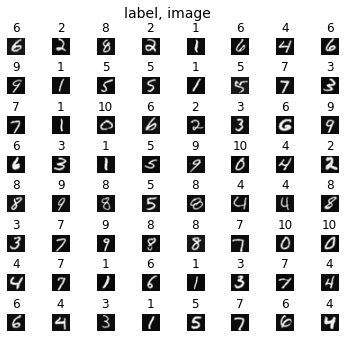

In [4]:
# visualizing data
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
m, n = X_train.shape
fig, axes = plt.subplots(8, 8, figsize = (5, 5))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat) :
    random_index = np.random.randint(m)
    X_random_reshaped = X_train[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    ax.set_title(y_train[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("label, image", fontsize = 14)

In [5]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape = (400,)),
        Dense(25, activation = 'relu', name = "L1"),
        Dense(15, activation = 'relu', name = "L2"),
        Dense(10, activation = 'linear', name = "L3")
    ]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [7]:
[layer1, layer2, layer3] = model.layers

In [8]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

In [9]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
)

model.fit(
    X_train ,y_train,
    epochs=40
)

Epoch 1/40


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ZETTAB~1\AppData\Local\Temp/ipykernel_9712/3314491614.py", line 6, in <module>
      model.fit(
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\zettabyte\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 10 which is outside the valid range of [0, 10).  Label values: 7 8 9 7 8 3 2 1 7 10 8 2 10 6 4 2 3 1 8 7 9 7 8 8 10 2 2 9 10 10 8 4
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_613]

1/1 [==============================] - 0s 26ms/step


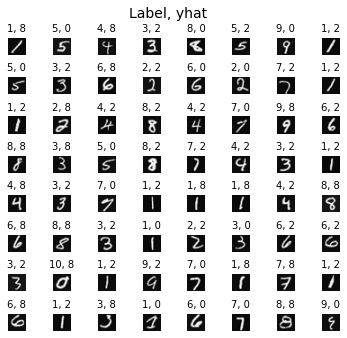

In [10]:
# predict
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
m, n = X_train.shape
fig, axes = plt.subplots(8, 8, figsize = (5, 5))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.91])
for i, ax in enumerate(axes.flat) :
    random_index = np.random.randint(m)
    X_random_reshaped = X_train[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    prediction = model.predict(X_train[random_index].reshape(1, 400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f"{y_train[random_index,0]}, {yhat}", fontsize = 10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()